<a href="https://colab.research.google.com/github/varshaelza/Text-Summarization-Categorization/blob/main/fuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd drive/My\ Drive/BBC Dataset

/content/drive/My Drive/BBC Dataset


In [ ]:
import pandas as pd
import numpy as np
traindata = pd.read_csv('/content/drive/MyDrive/BBC Dataset/fuzzytrain.csv')
testdata = pd.read_csv('/content/drive/MyDrive/BBC Dataset/fuzzytest.csv')

In [ ]:
traindata

,Unnamed: 0,News,Summary,Category_id,Type
0,0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech
1,1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics
2,2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business
3,3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport
4,4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport
...,...,...,...,...,...
1775,1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business
1776,1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics
1777,1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics
1778,1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport


In [ ]:
testdata

,Unnamed: 0,News,Summary,Category_id,Type
0,1288,Labour battle plan 'hides Blair'\n \n The Tori...,Mr Milburn said the economy would take centre ...,2,politics
1,1170,Tutu's Guantanamo release call\n \n Archbishop...,The South African archbishop said detentions w...,2,politics
2,1388,Holmes starts 2005 with GB events\n \n Kelly H...,Holmes will make her first track appearance on...,3,sport
3,1109,Tory expert denies defeatism\n \n The Conserva...,Mr Howard appointed Mr Crosby as his elections...,2,politics
4,1851,Movie body targets children's PCs\n \n The bod...,The Movie Association for America's (MPAA) fre...,4,tech
...,...,...,...,...,...
440,1117,NHS waiting time target is cut\n \n Hospital w...,"""But let us not forget two thirds of those wai...",2,politics
441,1234,Baron Kinnock makes Lords debut\n \n Former La...,Former Labour leader Neil Kinnock has official...,2,politics
442,1720,Player burn-out worries Robinson\n \n England ...,England coach Andy Robinson says English rugby...,3,sport
443,1230,Blunkett hints at election call\n \n Ex-Home S...,He clarified that he meant he would be in his ...,2,politics


In [ ]:
!sudo pip install nltk==3.4

     |████████████████████████████████| 1.4MB 14.1MB/s 
  Created wheel for nltk: filename=nltk-3.4-cp37-none-any.whl size=1436383 sha256=3ead59dd7c8f150c27a72c6ce4fe3474bd07eae17057877e75daaee2d9c5f612
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
# data visualisation
from matplotlib import pyplot as plt
%matplotlib inline

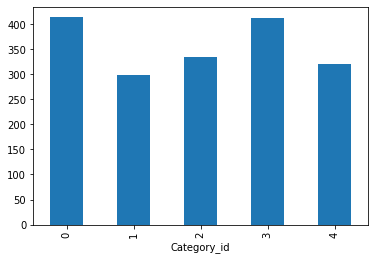

In [ ]:
traindata.groupby('Category_id').News.count().plot.bar(ylim=0)

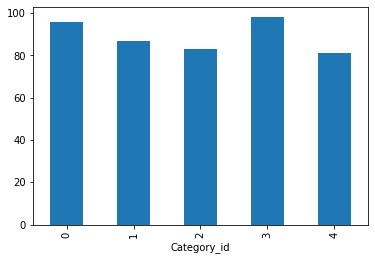

In [ ]:
testdata.groupby('Category_id').News.count().plot.bar(ylim=0)

In [ ]:
traindata.groupby('Category_id').News.count()

Category_id
0    414
1    299
2    334
3    413
4    320
Name: News, dtype: int64

In [ ]:
testdata.groupby('Category_id').News.count()

Category_id
0    96
1    87
2    83
3    98
4    81
Name: News, dtype: int64

In [ ]:
import csv
with open('fuzzytrain.csv', 'r') as file:
    #reader = csv.reader(file, delimiter = '\t')
    data = csv.DictReader(file)
    for row in data:
        print(row["News"])
        #print("_________")

Online games play with politics
 
 After bubbling under for some time, online games broke through onto the political arena in 2004.
 
 The US presidential election provided a showcase for many, aimed at talking directly to a generation that has grown up with joysticks and gamepads. Experts say this reflects how video games are becoming a mainstream part of culture and society. The first official political campaign game was technically launched during the last week of 2003: the Iowa Game, commissioned by the Democrat hopeful Howard Dean. More than 20 followed suit, including Frontrunner, eLections, President Forever and The Political Machine, which allowed players to run an entire presidential campaign, including having to cope with the media. Others helped raise the stakes during the Bush/Kerry contest by highlighting a candidate's virtues or his vices.
 
 The phenomenon has astonished the forefathers of political games, a handful of multi-discipline games enthusiasts keen to push fron

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Consumer spending lifts US growth
 
 US economic growth accelerated in the third quarter, helped by strong consumer spending, official figures have shown.
 
 The economy expanded at an annual rate of 3.7% in the July to September period, the Commerce Department said. The figure marked an increase on the 3.3% growth recorded in the second quarter, but fell short of the 4.2% rate pencilled in by forecasters. The increase reflected the biggest jump in consumer spending in a year. "It was a little softer than the consensus, but not a real surprise," said Gary Thayer, an economist at AG Edwards & Sons. Friday's growth estimate is one of the last significant pieces of economic data before the 2 November presidential election.
 
 Democrat challenger John Kerry has criticised President George W Bush's handling of the economy, pointing to a net loss of over 800,000 jobs since Mr Bush took office. Analysts said the economy was still not growing fast enough to stimulate large-scale job creation. 

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

logistic_sgd=drive.CreateFile({'id':'1QfMYnBYaIBMUQfwzkUW-h_8ESNQHZkS0'})
logistic_sgd.GetContentFile("logistic_sgd.py")


In [ ]:
shared_randomstreams=drive.CreateFile({'id':'1XQDMQ2lnc5ZEfJR0aivJTyNCHBcK1POs'})
shared_randomstreams.GetContentFile("shared_randomstreams.py")

In [ ]:
rbm=drive.CreateFile({'id':'1jQaQl7MZ93urOgSyIpuZ8PAlTuUcoizK'})
rbm.GetContentFile("rbm.py")

In [ ]:
!pip3 install theano


In [ ]:
from theano.tensor.shared_randomstreams import RandomStreams

In [ ]:
import rbm

In [ ]:
import nltk, csv, math, numpy, matplotlib
%matplotlib inline
! pip install -U scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from string import punctuation
nltk.download('averaged_perceptron_tagger')
#nltk.download('rake_nltk')
! pip install rake-nltk
from rake_nltk import Rake
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
bi_token=[]
bi_token_length=[]
tri_token_length=[]
nltk.download('punkt')
from nltk import sent_tokenize
with open('fuzzytrain.csv', 'r') as file:
    #reader = csv.reader(file, delimiter = '\t')
    data = csv.DictReader(file)

    #sentence tokenisation

    for row in data:
      sentences=(sent_tokenize(row["News"]))
      print("Sentences:", sentences)
      print('\n')
      emptyarray= np.empty((len(sentences),1,3),dtype=object)
      for s in range(len(sentences)):
        emptyarray[s][0][0] = sentences[s]
        emptyarray[s][0][1] = s
        
      #stopwords removal
      for u in range(len(sentences)):
        sent_split1=[w.lower() for w in sentences[u].split(" ")]
        sent_split=[w for w in sent_split1 if w not in stop_words and w not in punctuation and not w.isdigit()]
    
    #Bi-grams
        bigrams_list = [bigram for bigram in nltk.bigrams(sent_split)]
        bi_token.append(bigrams_list)
        bi_token_length.append(len(bi_token[u]))

      bi_tokens = [(int(o) / max(bi_token_length))*100 for o in bi_token_length]
      print("bitokens feature vector:",(bi_token_length))
#print(max(bi_token_length))
#print(bi_token_length)
      print("\n")

    #Tri-grams
      tri_token=[]
      for u in range(len(sentences)):
        sent_split2=[w.lower() for w in sentences[u].split(" ")]
        sent_split3=[w for w in sent_split2 if w not in stop_words and w not in punctuation and not w.isdigit()]
        
        trigrams_list = [trigram for trigram in nltk.trigrams(sent_split3)]
        tri_token.append(trigrams_list)
        tri_token_length.append(len(tri_token[u]))
      tri_tokens = [(int(m) / max(tri_token_length))*100 for m in tri_token_length]

      print("tritokens feature vector:",tri_token_length)
      print("\n")

#sentence position feature   
      def position(l):
        return [index for index, value in enumerate(sentences)]
  
      sent_position= (position(sentences))
      num_sent=len(sent_position)
      print("sentence position:",sent_position)
      print("\n")
      print("Total number of sentences:",num_sent)
      print("\n")

      position = []
      position_rbm = []
      sent_pos1_rbm = 1
      sent_pos1 = 100
      position.append(sent_pos1)
      position_rbm.append(sent_pos1_rbm)
      for x in range(1,num_sent-1):
          #s_p = (math.cos((sent_position[x]-minv)*((1/maxv)-minv)))*100
          #if s_p < 0:
          #   s_p = 0
          s_p= ((num_sent-x)/num_sent)*100
          position.append(s_p)
          s_p_rbm = (num_sent-x)/num_sent
          position_rbm.append(s_p_rbm)
    
      sent_pos2 = 100
      sent_pos2_rbm = 1
      position.append(sent_pos2)
      position_rbm.append(sent_pos2_rbm)
      print("Sentence position feature vector:",position_rbm)
      print("\n")

#converting sentences to vectors       
      def convertToVSM(sentences):
        vocabulary = []
        for sents in sentences:
            vocabulary.extend(sents)
        vocabulary = list(set(vocabulary))
        vectors = []
        for sents in sentences:
            vector = []
            for tokenss in vocabulary:
                vector.append(sents.count(tokenss))
            vectors.append(vector)
        return vectors
      VSM=convertToVSM(sentences)
      print("SentenceVectors:",VSM)
      print("\n")

#tf-isf and centroid 
      sentencelength=len(sentences)
      #print("sentlen:",sentencelength)
      def calcMeanTF_ISF(VSM, index):
          vocab_len = len(VSM[index])
          sentences_len = len(VSM)
          #print("lenvsmind:",vocab_len)
          count = 0
          tfisf = 0
          for i in range(vocab_len):
              tf = VSM[index][i]
              if(tf>0):
                  count += 1
                  sent_freq = 0
                  for j in range(sentences_len):
                      if(VSM[j][i]>0): sent_freq += 1
                  tfisf += (tf)*(1.0/sent_freq)
          if(count > 0):
              mean_tfisf = tfisf/count
          else:
              mean_tfisf = 0
          return tf, (1.0/sent_freq), mean_tfisf
      tfvec=[]
      isfvec=[]
      tfisfvec=[]
      tfisfvec_rbm=[]
      for i in range(sentencelength):
          x,y,z=calcMeanTF_ISF(VSM,i)
          tfvec.append(x)
          isfvec.append(y)
          tfisfvec.append(z*100)
          tfisfvec_rbm.append(z)
      #print("TF vector:",tfvec)
      #print("\n")
      #print("ISF vector:",isfvec)
      #print("\n")
      #tfisf1= [(int(p)*100) for p in tfisfvec]
      print("TF-ISF vector:",tfisfvec_rbm)
      print("\n")
      maxtf_isf=max(tfisfvec_rbm)
      centroid=[]
      centroid.append(maxtf_isf)
      print("Max TF-ISF:",centroid)
      print("\n")
      #for q in range(sentencelength):
      centroid=(max(VSM))
      print("Centroid:",centroid)
      print("\n")

#cosine-similarity between centroids and sentences
      from numpy import dot
      from numpy.linalg import norm
      cosine_similarity=[]
      cosine_similarity_rbm=[]
      for z in range(sentencelength):
          cos_simi = ((dot(centroid, VSM[z])/(norm(centroid)*norm(VSM[z])))*100)
          cosine_similarity.append(cos_simi)
          cos_simi_rbm = (dot(centroid, VSM[z])/(norm(centroid)*norm(VSM[z])))
          cosine_similarity_rbm.append(cos_simi_rbm)
      print("Cosine Similarity Vector:",cosine_similarity_rbm)
      print("\n")

#sentence length feature
      sent_word=[]
      for u in range(len(sentences)):
          sent_split1=[w.lower() for w in sentences[u].split(" ")]
          sent_split=[w for w in sent_split1 if w not in stop_words and w not in punctuation and not w.isdigit()]
          a=(len(sent_split))
          sent_word.append(a)
      longest_sent=max(sent_word)
      sent_length=[]
      sent_length_rbm=[]
      for x in sent_word:
          sent_length.append((x/longest_sent)*100)
          sent_length_rbm.append(x/longest_sent)
      #print(sent_length)

      print("Sentence length feature vector:",sent_length_rbm)
      print("\n")

#numeric token feature
      import re
      num_word=[]
      numeric_token=[]
      numeric_token_rbm=[]
      for u in range(len(sentences)):
          sent_split4=sentences[u].split(" ")
          e=re.findall("\d+",sentences[u])
          noofwords=(len(e))
          num_word.append(noofwords)
          numeric_token.append((num_word[u]/sent_word[u])*100)
          numeric_token_rbm.append(num_word[u]/sent_word[u])
      #print("Numeric word count in each sentence:",num_word)
      #print("\n")
      print("Numeric token feature vector:",numeric_token_rbm)
      print("\n")

#thematic words feature
      r = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.    *********optimise with our own*********
      keywords=[]
      for s in sentences:
          r.extract_keywords_from_text(s)
          key=list(r.get_ranked_phrases())
          keywords.append(key)
      #print(keywords)
      l_keywords=[]
      for s in keywords:
          leng=len(s)
          l_keywords.append(leng)
      #print(l_keywords)

      total_keywords=sum(l_keywords)
      #print(total_keywords)

      thematic_number= []
      thematic_number_rbm= []
      for x in l_keywords:
          thematic_number.append((x/total_keywords)*100)
          thematic_number_rbm.append(x/total_keywords)
      print("Thematic word feature", thematic_number_rbm)
      print("\n")


#proper noun feature

      from nltk.tag import pos_tag
      from collections import Counter
      pncounts = []
      pncounts_rbm = []
      for sentence in sentences:
          tagged=nltk.pos_tag(nltk.word_tokenize(str(sentence)))
          counts = Counter(tag for word,tag in tagged if tag.startswith('NNP') or tag.startswith('NNPS'))
          f=sum(counts.values())
          pncounts.append(f)
          pncounts_rbm.append(f)
      pnounscore=[(int(o) / int(p))*100 for o,p in zip(pncounts, sent_word)]
      pnounscore_rbm=[int(o) / int(p) for o,p in zip(pncounts_rbm, sent_word)]
      #print(pncounts)
      print("Pronoun feature vector",pnounscore_rbm)
      print("\n")


      featureMatrix = []
      featureMatrix.append(position_rbm)
      featureMatrix.append(bi_token_length)
      featureMatrix.append(tri_token_length)
      featureMatrix.append(tfisfvec_rbm)
      featureMatrix.append(cosine_similarity_rbm)
      featureMatrix.append(thematic_number_rbm)
      featureMatrix.append(sent_length_rbm)
      featureMatrix.append(numeric_token_rbm)
      featureMatrix.append(pnounscore_rbm)



      featureMat = np.zeros((len(sentences),9))
      for i in range(9) :
          for j in range(len(sentences)):
              featureMat[j][i] = featureMatrix[i][j]

      print("\n\n\nPrinting Feature Matrix : ")
      print(featureMat)
      print("\n\n\nPrinting Feature Matrix Normed : ")
      #featureMat_normed = featureMat / featureMat.max(axis=0)
      featureMat_normed = featureMat

      print(featureMat_normed)
      for i in range(len(sentences)):
          print(featureMat_normed[i])






      #######   


      import rbm

      temp = rbm.test_rbm(dataset = featureMat_normed,learning_rate=0.01, training_epochs=15, batch_size=5,n_chains=9,
                  n_hidden=9)

      print("\n\n")
      #print(np.sum(temp, axis=1))

      enhanced_feature_sum = []

      for i in range(len(np.sum(temp,axis=1))) :
          enhanced_feature_sum.append([np.sum(temp,axis=1)[i],i])
          emptyarray[i][0][2]=np.sum(temp,axis=1)[i]
      print("enhanced feature sum",enhanced_feature_sum)
      print("\n\n\n")

      enhanced_feature_sum.sort(key=lambda x: x[0])
      print("enhanced feature sum sorted",enhanced_feature_sum)

      length_to_be_extracted = len(enhanced_feature_sum)/2

      print("\n\nThe text is : \n\n")
      for x in range(len(sentences)):
          print(sentences[x])

      print("\n\n\nExtracted sentences : \n\n\n")
      extracted_sentences = []
      extracted_sentences.append([sentences[0], 0])



      for x in range(int(length_to_be_extracted)) :
          if(enhanced_feature_sum[x][1] != 0) :
              extracted_sentences.append([sentences[enhanced_feature_sum[x][1]], enhanced_feature_sum[x][1]])
            

      print(extracted_sentences)
      extracted_sentences.sort(key=lambda x: x[1])
      print("\n\n")
      #print(extracted_sentences)


      summary1=[]
      #finalText = ""
      #print("\n\n\nExtracted Final Text : \n\n\n")
      for i in range(len(extracted_sentences)):
          final_text="\n"+extracted_sentences[i][0]
          final_text_1=extracted_sentences[i][0]
          summary1.append(final_text_1)
          #print(final_text)
      #print(summary1)
      #print(len(summary1))
          #summary=" ".join(final_text)
      #print(summary)
          #finalText = finalText + extracted_sentences[i][0]

          #summary_file.write(final_text)
      #summary_file.close()

      emparray1 = emptyarray[0]
      #print(emparray1)
      emparray2 = emptyarray[1:,:,:]

      emparray2 = emparray2[np.argsort(emparray2[:,0,2])]
      emparray2 = emparray2[::-1]
      sh=emparray2.shape[0]
      sh=int(sh/2)+1
      emparray2=emparray2[:sh]
      emparray2 = emparray2[np.argsort(emparray2[:,0,1])]
      #print(emparray2)
      #emparray3 = np.concatenate((emparray1,emparray2), axis=1)
      #print(emparray3)

      rbmarray=emparray2[:,:,:2]
      rbm_summary = []
      for i in range(rbmarray.shape[0]):
          rbm_summary.append(rbmarray[i][0][0])
          
      print("RBM summary \n\n",rbm_summary)

# *************************************************************************************** #

#    FUZZY LOGIC IMPLEMENTATION 
      
      position1 = ctrl.Antecedent(np.arange(0, 100, 10), 'position1')
      cos_similarity = ctrl.Antecedent(np.arange(0, 100, 10), 'cos_similarity')
      bitokens = ctrl.Antecedent(np.arange(0, 100, 10), 'bitokens')
      tritokens = ctrl.Antecedent(np.arange(0, 100, 10), 'tritokens')
      propernoun = ctrl.Antecedent(np.arange(0, 100, 10), 'propernoun')
      sentencelength = ctrl.Antecedent(np.arange(0, 100, 10), 'sentencelength')
      numtokens = ctrl.Antecedent(np.arange(0, 100, 10), 'numtokens')
      keywords = ctrl.Antecedent(np.arange(0, 10, 1), 'keywords')
      tf_isf = ctrl.Antecedent(np.arange(0, 100, 10), 'tf_isf')

      senten = ctrl.Consequent(np.arange(0, 100, 10), 'senten')

      position1.automf(3)
      cos_similarity.automf(3)
      bitokens.automf(3)
      tritokens.automf(3)
      propernoun.automf(3)
      sentencelength.automf(3)
      numtokens.automf(3)
      keywords.automf(3)
      tf_isf.automf(3)

      senten['bad'] = fuzz.trimf(senten.universe, [0, 0, 50])
      senten['avg'] = fuzz.trimf(senten.universe, [0, 50, 100])
      senten['good'] = fuzz.trimf(senten.universe, [50, 100, 100])

      rule1 = ctrl.Rule(position1['good'] & sentencelength['good'] & propernoun['good'] &numtokens['good'], senten['good'])
      rule2 = ctrl.Rule(position1['poor'] & sentencelength['poor'] & numtokens['poor'], senten['bad'])
      rule3 = ctrl.Rule(propernoun['poor'] & keywords['average'], senten['bad'])
      rule4 = ctrl.Rule(cos_similarity['good'], senten['good'])
      rule5 = ctrl.Rule(bitokens['good'] & tritokens['good'] & numtokens['average'] | tf_isf['average'], senten['avg'])

      sent_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
      Sent = ctrl.ControlSystemSimulation(sent_ctrl)
      fuzzemptyarr= np.empty((20,1,2), dtype=object)
      t2=0
      summary2=[]
      for s in range(len(sentences)):
          Sent.input['position1'] = int(position[s])
          Sent.input['cos_similarity'] = int(cosine_similarity[s])
          Sent.input['bitokens'] = int(bi_tokens[s])
          Sent.input['tritokens'] = int(tri_tokens[s])
          Sent.input['tf_isf'] = int(tfisfvec[s])
          Sent.input['keywords'] = int(thematic_number[s])
          Sent.input['propernoun'] = int(pnounscore[s])
          Sent.input['sentencelength'] = int(sent_length[s])
          Sent.input['numtokens'] = int(numeric_token[s])
      #Sent.input['service'] = 2
          Sent.compute()
          
          if Sent.output['senten'] > 50:
              summary2.append((sentences[s]))
              
              fuzzemptyarr[t2][0][0] = sentences[s]
              fuzzemptyarr[t2][0][1] = s
              t2+=1
         
      fuzzarray = np.empty((len(summary2),1,2),dtype=object)
      for i in range(len(summary2)):
          fuzzarray[i][0][0] = fuzzemptyarr[i][0][0]
          fuzzarray[i][0][1] = fuzzemptyarr[i][0][1]
          
      fuzzarray=fuzzarray[1:]
      print("Fuzzy logic summary \n\n",summary2)
      print(len(summary2))

      #traindata["summary"]=summary2
      
      print("********************************************************************************")


Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.7/dist-packages (0.4.2)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Sentences: ['Online games play with politics\n \n After bubbling under for some time, online games broke through onto the political arena in 2004.', 'The US presidential election provided a showcase for many, aimed at talking directly to a generation that has grown up with joysticks and gamepads.', 'Experts say this reflects how video games are becoming a mainstream part of culture and society.', 'The first official political campaign game was technically launched during the last week of 2003: the Iowa Game, commissioned by the Democrat hopeful Howard Dean.', 'More than 20 followed suit, including Frontrunner, eLections, President Forever and The Political Machine, which allowed players to run an entire presidential campaign, including having to cope with the media.', "Others helped raise the stakes during the Bush/Kerry contest by highlighting a candidate's virtues or his vices.", 'The phenomenon has astonished the forefathers of political games, a handful of multi-discipline games en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: ignored